In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

In [2]:
features = np.array(['Fp1_Delta',
'F3_Delta',
'F4_Delta',
'C3_Delta',
'P4_Delta',
'F3_Theta',
'C3_Theta',
'T4_Theta',
'P4_Theta',
'F3_Alpha',
'F4_Alpha',
'F7_Alpha',
'T6_Alpha',
'P4_Alpha',
'F3_Beta',
'F3_Gamma',
'T3_Gamma',
'F3_Slow',
'F3_Low_beta',
'T4_Low_beta',
'C3_relative_gamma',
'alpha_frontal',
'alpha_temporal',
'alpha_asymmetry',
'beta_frontal'])

In [3]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
X_ori, _ = getXY(csv,features=features)
csv = pd.read_csv('export/15s_133features_filter_std_pca8.csv')
X_pca8, _ = getXY(csv)
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
X_pca133, _ = getXY(csv)

X_ori.shape=(720, 25) y_ori.shape=(720,)
X_ori.shape=(720, 8) y_ori.shape=(720,)
X_ori.shape=(720, 133) y_ori.shape=(720,)


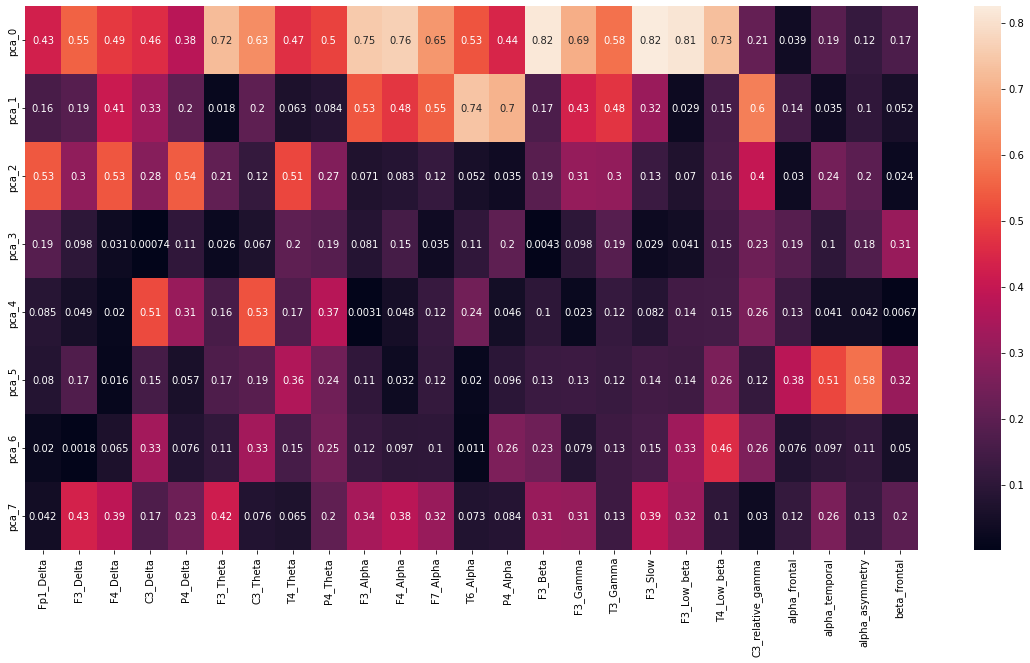

In [10]:
pca_list = []
for i in range(8):
    pca_list.append(f"pca_{i}")
df_pca8 = pd.DataFrame(np.concatenate([X_ori,X_pca8],axis=1), columns=list(features)+pca_list)
corrMatrix = df_pca8.corr()
plt.rcParams["figure.figsize"] = (20,10)
sn.heatmap(abs(corrMatrix.iloc[list(range(25,25+8)),list(range(0,25))]), annot=True)
plt.show()

X_ori.shape=(720, 133) y_ori.shape=(720,)
X_ori.shape=(720, 8) y_ori.shape=(720,)


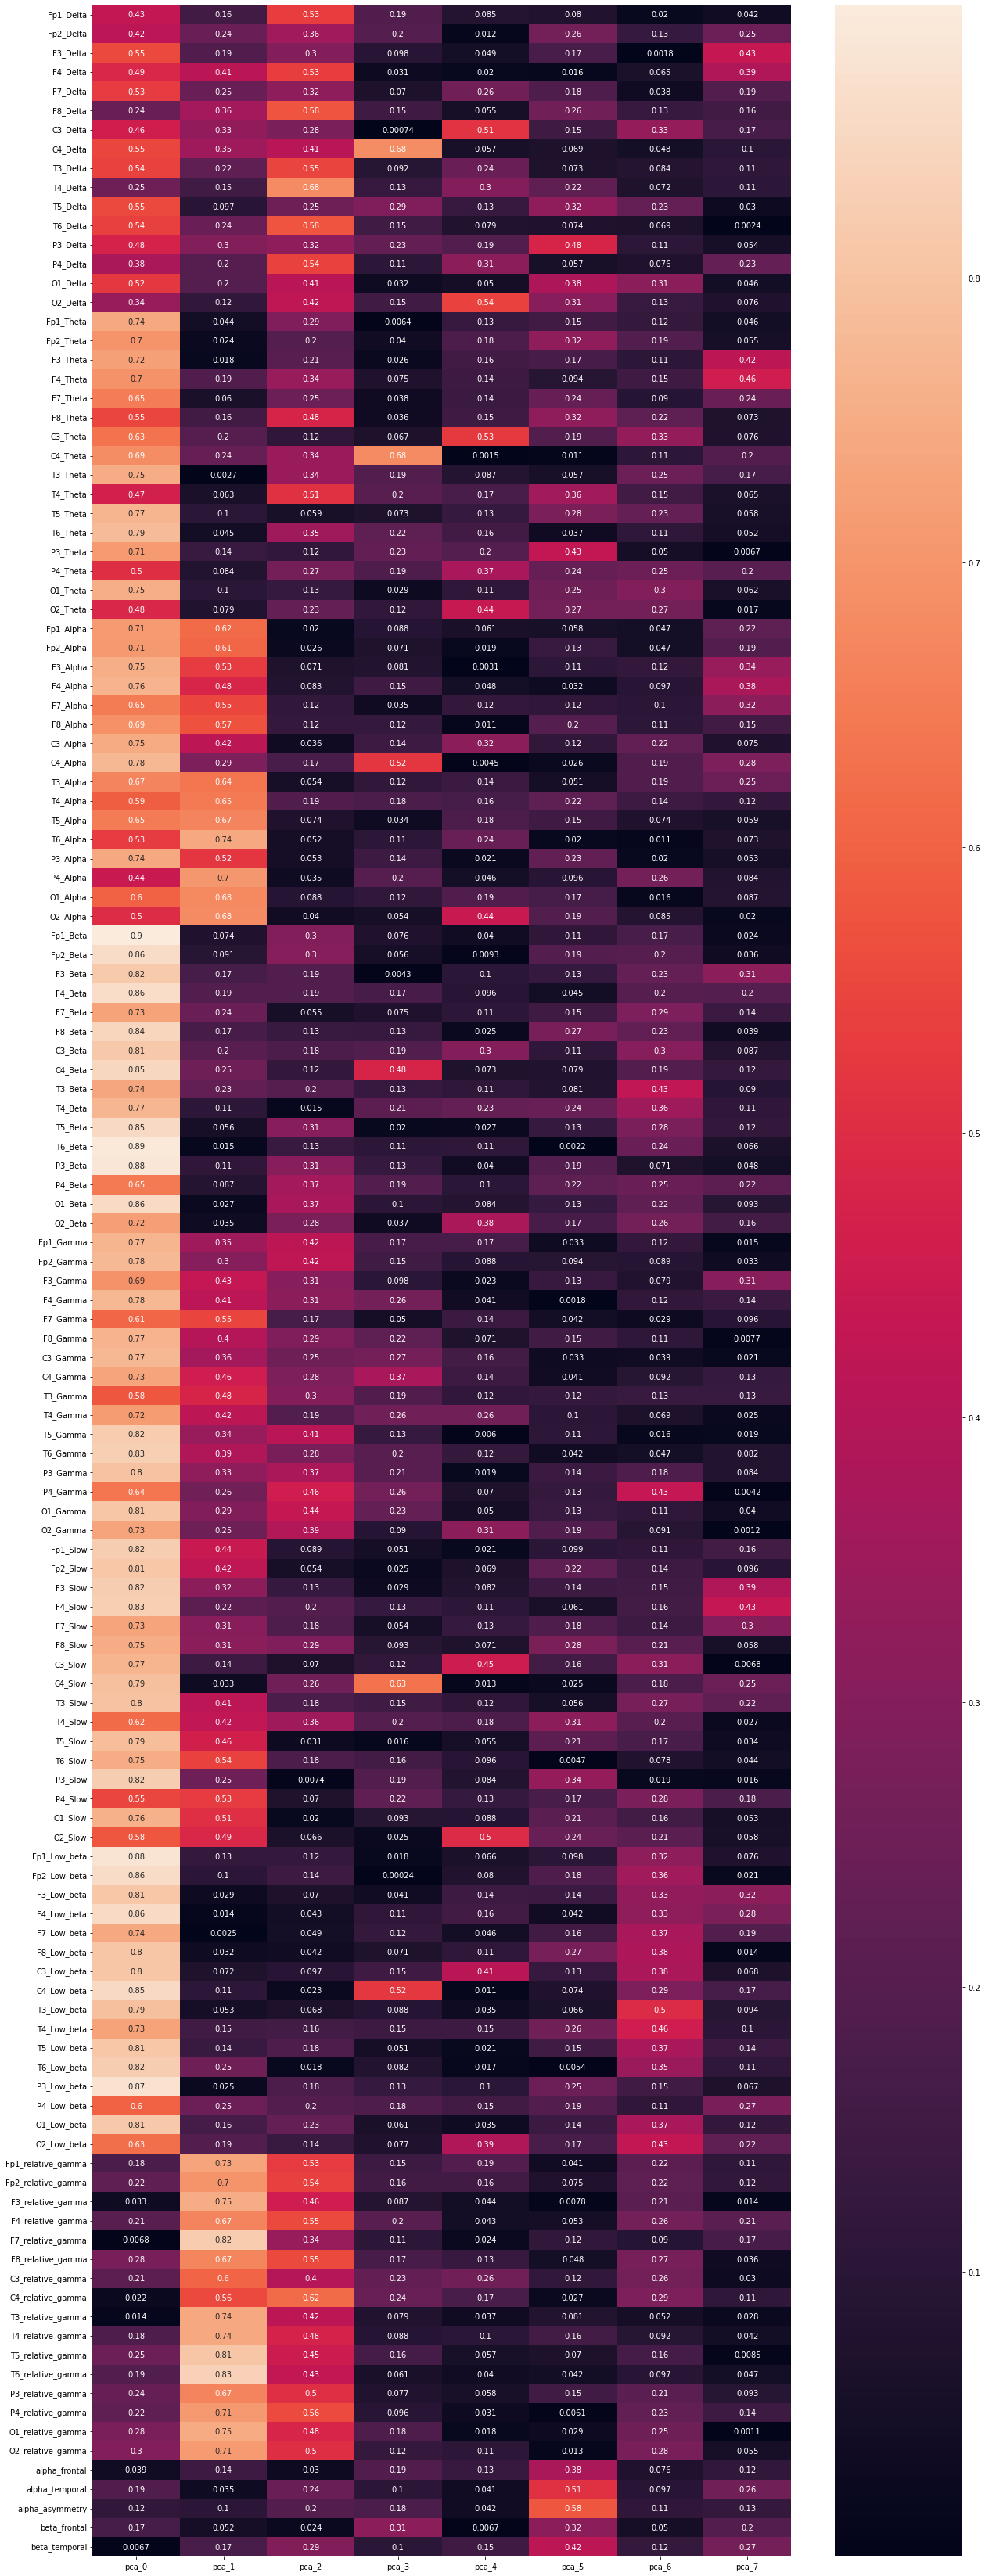

In [15]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
X_ori, _ = getXY(csv)
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
csv = pd.read_csv('export/15s_133features_filter_std_pca8.csv')
X_pca8, _ = getXY(csv)

pca_list = []
for i in range(8):
    pca_list.append(f"pca_{i}")
df_pca8 = pd.DataFrame(np.concatenate([X_ori,X_pca8],axis=1), columns=head+pca_list)
corrMatrix = df_pca8.corr()
plt.rcParams["figure.figsize"] = (20,60)
sn.heatmap(abs(corrMatrix.iloc[list(range(0,133)),  list(range(133,133+8))]), annot=True)
plt.show()

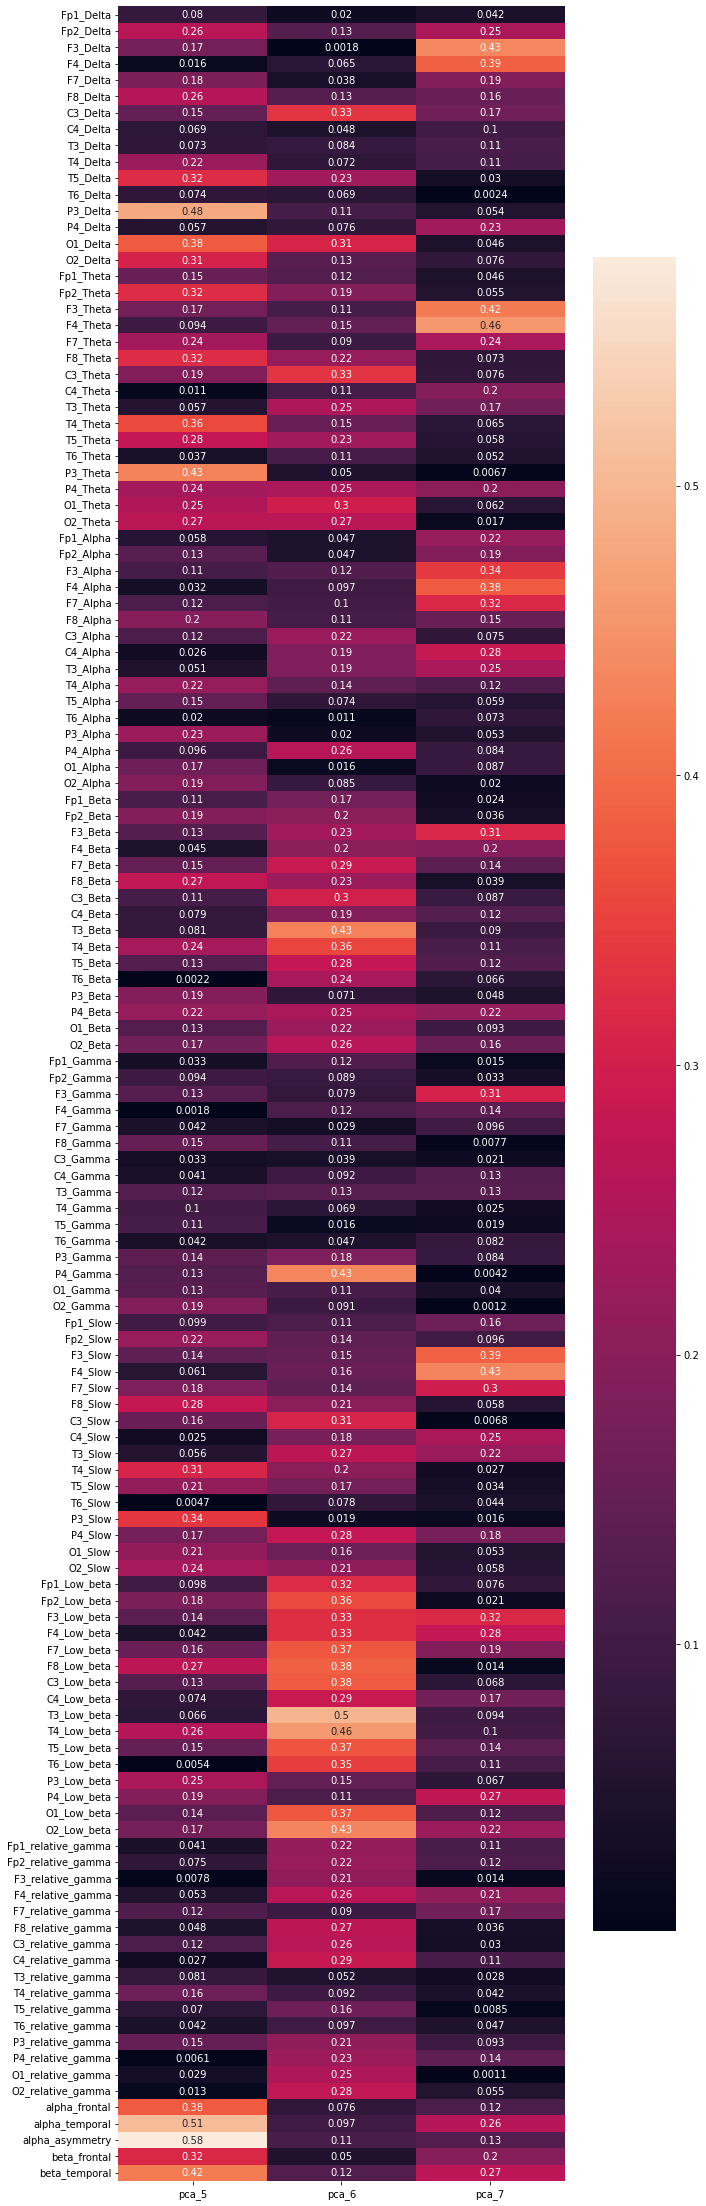

In [16]:
plt.rcParams["figure.figsize"] = (10,40)
sn.heatmap(abs(corrMatrix.iloc[list(range(0,133)), list(range(133+5,133+8))]), annot=True)
plt.show()

In [9]:
def train_model(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()

    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [10]:
csv = pd.read_csv('export/15s_133features_filter_std_pca8.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
for i in range(8):
    X,y = getXY(csv.copy(),features=head[[i]] , do_print=False)
    model,acc,cross = train_model(X,y,do_print=False)
    print(acc, cross.mean())

0.5847222222222223 0.5847222222222223
0.6430555555555556 0.6388888888888888
0.5958333333333333 0.576388888888889
0.6083333333333333 0.5972222222222221
0.6722222222222223 0.6708333333333333
0.6013888888888889 0.5958333333333334
0.6305555555555555 0.6277777777777778
0.7263888888888889 0.7097222222222223


In [11]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
for i in range(10):
    X,y = getXY(csv.copy(),features=head[[i]] , do_print=False)
    model,acc,cross = train_model(X,y,do_print=False)
    print(acc, cross.mean())

0.5847222222222223 0.576388888888889
0.6416666666666667 0.6319444444444444
0.5958333333333333 0.5986111111111112
0.6083333333333333 0.6041666666666667
0.6722222222222223 0.675
0.6027777777777777 0.5972222222222221
0.6319444444444444 0.625
0.725 0.7069444444444445
0.5819444444444445 0.5736111111111111
0.6291666666666667 0.6208333333333333


NameError: name 'X_pca8' is not defined

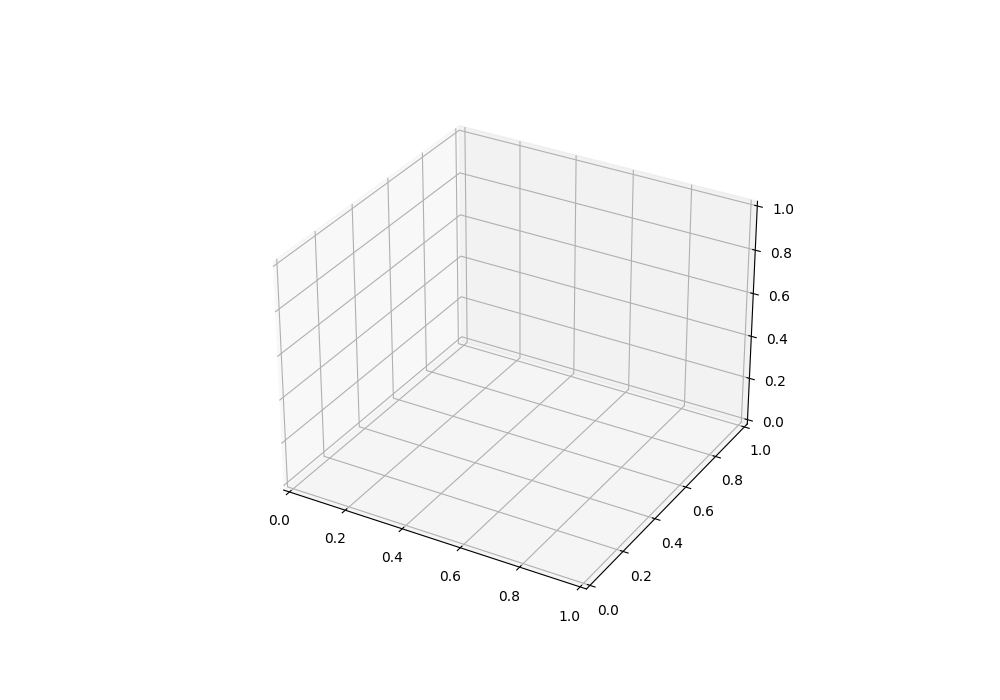

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_pca8[:,2],X_pca8[:,4],X_pca8[:,7], c=y)

In [13]:
from itertools import combinations


csv = pd.read_csv('export/15s_133features_filter_std_pca8.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
for comb in combinations( range(8) , 7 ):
    X,y = getXY(csv.copy(),features=head[list(comb)] , do_print=False)
    model,acc,cross = train_model(X,y,do_print=False)
    if(acc > 0.97):
        print(comb, acc, cross.mean())


(0, 1, 2, 3, 4, 5, 7) 0.9819444444444444 0.976388888888889
(0, 1, 2, 3, 4, 6, 7) 0.9763888888888889 0.9597222222222221
(0, 1, 2, 3, 5, 6, 7) 0.975 0.9611111111111109
(0, 1, 2, 4, 5, 6, 7) 0.975 0.9652777777777779
(0, 1, 3, 4, 5, 6, 7) 0.9791666666666666 0.9680555555555556
(0, 2, 3, 4, 5, 6, 7) 0.9722222222222222 0.9597222222222221
(1, 2, 3, 4, 5, 6, 7) 0.9791666666666666 0.9666666666666668
